# Mid-Course Project

Hi there,

I’m the host of a movie reviews podcast and I’m currently making an episode about movie review aggregators.

I found this data set from Rotten Tomatoes (inside the .ipynb file that I’ve attached). Could you dig into the data and share any interesting insights that you find? My audience loves fun facts about movies.

Thank you!\
KP

## 0. Read in the Data

In [86]:
# rotten tomatoes movie data set from Maven's data playground
import pandas as pd
import seaborn as sns
movies = pd.read_csv('../Data/Rotten Tomatoes Movies.csv')
movies.head(3)

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,audience_count
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2010-06-29,83.0,20th Century Fox,Rotten,49,144,53.0,254287.0
1,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,2010-10-19,90.0,Sony Pictures Classics,Certified Fresh,86,140,64.0,11567.0
2,10,Blake Edwards' 10 stars Dudley Moore as George...,NaN,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,1997-08-27,118.0,Waner Bros.,Fresh,68,22,53.0,14670.0


In [87]:
# let's work with a subset of the data for this project
movies = movies[['movie_title', 'rating', 'genre', 'in_theaters_date','runtime_in_minutes',
                 'tomatometer_rating', 'tomatometer_count', 'audience_rating', 'audience_count']]
movies.head()

,movie_title,rating,genre,in_theaters_date,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,audience_count
0,Percy Jackson & the Olympians: The Lightning T...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",2010-02-12,83.0,49,144,53.0,254287.0
1,Please Give,R,Comedy,2010-04-30,90.0,86,140,64.0,11567.0
2,10,R,"Comedy, Romance",1979-10-05,118.0,68,22,53.0,14670.0
3,12 Angry Men (Twelve Angry Men),NR,"Classics, Drama",1957-04-13,95.0,100,51,97.0,105000.0
4,"20,000 Leagues Under The Sea",G,"Action & Adventure, Drama, Kids & Family",1954-01-01,127.0,89,27,74.0,68860.0


## 1. Explore the Data

How many movies are in this data set?

In [88]:
movies.info() # 16638 movies

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16638 entries, 0 to 16637
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_title         16638 non-null  object 
 1   rating              16638 non-null  object 
 2   genre               16621 non-null  object 
 3   in_theaters_date    15823 non-null  object 
 4   runtime_in_minutes  16483 non-null  float64
 5   tomatometer_rating  16638 non-null  int64  
 6   tomatometer_count   16638 non-null  int64  
 7   audience_rating     16386 non-null  float64
 8   audience_count      16386 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 1.1+ MB


Filter the data to only include movies that came out in 2010 or later. How many movies are in this new data set?

In [89]:
movies.in_theaters_date = pd.to_datetime(movies.in_theaters_date)

In [90]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16638 entries, 0 to 16637
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   movie_title         16638 non-null  object        
 1   rating              16638 non-null  object        
 2   genre               16621 non-null  object        
 3   in_theaters_date    15823 non-null  datetime64[ns]
 4   runtime_in_minutes  16483 non-null  float64       
 5   tomatometer_rating  16638 non-null  int64         
 6   tomatometer_count   16638 non-null  int64         
 7   audience_rating     16386 non-null  float64       
 8   audience_count      16386 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 1.1+ MB


In [91]:
movies_after2010 = movies[movies.in_theaters_date.dt.year >= float('2010')]
movies_after2010.head()

,movie_title,rating,genre,in_theaters_date,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,audience_count
0,Percy Jackson & the Olympians: The Lightning T...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",2010-02-12,83.0,49,144,53.0,254287.0
1,Please Give,R,Comedy,2010-04-30,90.0,86,140,64.0,11567.0
97,Fireflies in the Garden,R,Drama,2011-10-14,98.0,22,54,45.0,45150.0
130,The Oxford Murders,R,"Art House & International, Drama, Horror, Myst...",2010-08-06,110.0,9,11,33.0,14548.0
155,Priest,PG-13,"Action & Adventure, Horror, Mystery & Suspense...",2011-05-13,83.0,15,99,46.0,86566.0


In [92]:
movies_after2010.info() # 6053 movies

<class 'pandas.core.frame.DataFrame'>
Index: 6053 entries, 0 to 16634
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   movie_title         6053 non-null   object        
 1   rating              6053 non-null   object        
 2   genre               6048 non-null   object        
 3   in_theaters_date    6053 non-null   datetime64[ns]
 4   runtime_in_minutes  5930 non-null   float64       
 5   tomatometer_rating  6053 non-null   int64         
 6   tomatometer_count   6053 non-null   int64         
 7   audience_rating     5956 non-null   float64       
 8   audience_count      5956 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 472.9+ KB


Find the highest rated movies according to both critics (*tomatometer_rating*) and the general audience (*audience_rating*).

In [93]:
movies_after2010['tomatometer_rating'].sort_values(ascending=False).head(10)

3093     100
8500     100
8495     100
8477     100
8461     100
5446     100
11796    100
5536     100
11861    100
5541     100
Name: tomatometer_rating, dtype: int64

In [94]:
movies_after2010['audience_rating'].sort_values(ascending=False).head(10)

14566    100.0
9051     100.0
7137     100.0
16438    100.0
14580    100.0
4239     100.0
12579    100.0
4027     100.0
15001    100.0
12960    100.0
Name: audience_rating, dtype: float64

In [95]:
mask = (movies_after2010['audience_rating'] >= 100) & (movies_after2010['tomatometer_rating'] >= 100)
movies_after2010[mask].sort_values(['audience_rating', 'tomatometer_rating'], ascending=False)

,movie_title,rating,genre,in_theaters_date,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,audience_count
4239,Charm City,NR,Documentary,2018-10-19,108.0,100,16,100.0,24.0
14566,The Miners' Hymns,NR,"Documentary, Drama, Special Interest",2012-02-08,52.0,100,10,100.0,148.0
15001,The Uncondemned,NR,Documentary,2016-10-21,81.0,100,13,100.0,124.0


In [96]:
print(movies_after2010.loc[4239].movie_title)
print(movies_after2010.loc[14566].movie_title)
print(movies_after2010.loc[15001].movie_title)

Charm City
The Miners' Hymns
The Uncondemned


These top movies seem to have very few critics and audience members writing the reviews. We want to look at only the most popular movies. Filter the movies data set to only include movies that have 100k+ audience ratings. How many movies are in this data set?

In [97]:
# there are about 300 movies for us to work with
movies_popular_after2010 = movies_after2010[movies_after2010.audience_count > 100000]
movies_popular_after2010.head()

,movie_title,rating,genre,in_theaters_date,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,audience_count
0,Percy Jackson & the Olympians: The Lightning T...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",2010-02-12,83.0,49,144,53.0,254287.0
248,Tron Legacy,PG,"Action & Adventure, Science Fiction & Fantasy",2010-12-17,125.0,51,239,63.0,171385.0
265,The Last Song,PG,"Drama, Kids & Family, Romance",2010-03-31,107.0,20,118,66.0,160777.0
274,Repo Men,R,"Action & Adventure, Science Fiction & Fantasy",2010-03-19,119.0,22,151,41.0,100453.0
284,Predators,R,"Action & Adventure, Horror, Science Fiction & ...",2010-07-09,107.0,65,198,52.0,159760.0


In [98]:
movies_popular_after2010.info() # 316 movies

<class 'pandas.core.frame.DataFrame'>
Index: 316 entries, 0 to 16634
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   movie_title         316 non-null    object        
 1   rating              316 non-null    object        
 2   genre               316 non-null    object        
 3   in_theaters_date    316 non-null    datetime64[ns]
 4   runtime_in_minutes  316 non-null    float64       
 5   tomatometer_rating  316 non-null    int64         
 6   tomatometer_count   316 non-null    int64         
 7   audience_rating     316 non-null    float64       
 8   audience_count      316 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 24.7+ KB


Find the highest rated **popular** movies according to both critics (*tomatometer_rating*) and the general audience (*audience_rating*).

In [99]:
movies_popular_after2010['audience_rating'].sort_values(ascending=False).head(10)

16634    92.0
6950     92.0
4077     92.0
14397    92.0
14549    91.0
7558     91.0
7864     91.0
9581     91.0
3381     91.0
14319    91.0
Name: audience_rating, dtype: float64

In [100]:
movies_popular_after2010['tomatometer_rating'].sort_values(ascending=False).head(10)

7558     99
15416    98
7925     98
16634    97
9355     97
13629    96
6868     96
7113     96
2767     96
14462    96
Name: tomatometer_rating, dtype: int64

In [101]:
mask = (movies_popular_after2010['audience_rating'] >= 91) & (movies_popular_after2010['tomatometer_rating'] >= 96)

In [102]:
movies_popular_after2010[mask].sort_values(['audience_rating', 'tomatometer_rating'], ascending=False)

,movie_title,rating,genre,in_theaters_date,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,audience_count
16634,Zootopia,PG,"Action & Adventure, Animation, Comedy",2016-03-04,108.0,97,279,92.0,100946.0
7558,How to Train Your Dragon,PG,"Animation, Kids & Family, Science Fiction & Fa...",2010-03-26,98.0,99,208,91.0,312342.0


In [103]:
print(movies_popular_after2010.loc[16634].movie_title)
print(movies_popular_after2010.loc[7558].movie_title)

Zootopia
How to Train Your Dragon


A lot of these popular movies seem to have a PG or PG-13 rating. How many movies fall under each type of rating?

*Use this popular movies data set going forward in this notebook.*

In [104]:
movies = movies_popular_after2010

In [105]:
moviesByRating = movies.groupby('rating')['movie_title'].count()
moviesByRating

rating
G          5
PG        51
PG-13    160
R        100
Name: movie_title, dtype: int64

<Axes: title={'center': 'Number of Movies by Rating'}, xlabel='rating'>

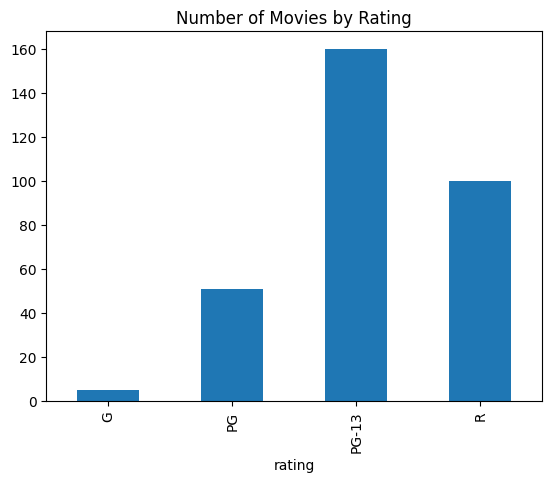

In [106]:
moviesByRating.plot(kind='bar', title='Number of Movies by Rating')

What is the average audience rating for each movie rating type? Which rating type is most highly rated?

In [107]:
avrRating = dict(movies.groupby('rating')['audience_rating'].mean())
print(avrRating)

{'G': 66.2, 'PG': 66.82352941176471, 'PG-13': 67.29375, 'R': 63.01}


<Axes: xlabel='Rating', ylabel='Average Audience Rating'>

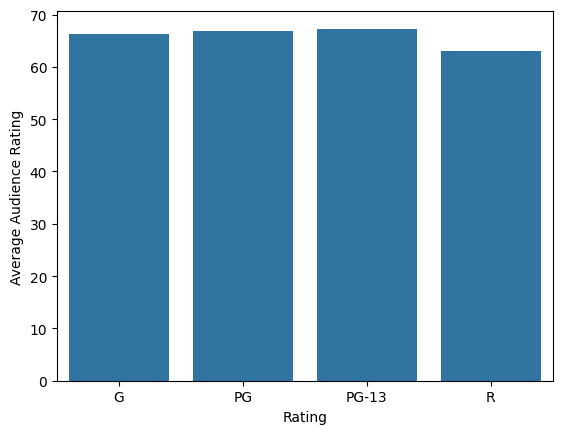

In [112]:
df_avrRating = pd.DataFrame(list(avrRating.items()), columns=['Rating', 'Average Audience Rating'])
sns.barplot(x='Rating', y='Average Audience Rating', data=df_avrRating)

## 2. Create New Columns

Create a column in the DataFrame called 'Animation' and return a 1 if a movie is an 'Animation' movie and 0 otherwise. Do the same for *Action & Adventure* and *Comedy*.

*Hint: use np.where and str.contains*

In [115]:
import numpy as np
movies.loc[:, 'Animation'] = np.where(movies['genre'].str.contains('Animation'), 1, 0)
movies.loc[:, 'Comedy'] = np.where(movies['genre'].str.contains('Comedy'), 1, 0)
movies.loc[:, 'Action&Adventure'] = np.where(movies['genre'].str.contains('Action'), 1, 0)
# Used movies.loc[:, ...] to avoid SettingWithCopyWarning ! 

In [116]:
movies.head()

,movie_title,rating,genre,in_theaters_date,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,audience_count,Animation,Comedy,Action&Adventure
0,Percy Jackson & the Olympians: The Lightning T...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",2010-02-12,83.0,49,144,53.0,254287.0,0,1,1
248,Tron Legacy,PG,"Action & Adventure, Science Fiction & Fantasy",2010-12-17,125.0,51,239,63.0,171385.0,0,0,1
265,The Last Song,PG,"Drama, Kids & Family, Romance",2010-03-31,107.0,20,118,66.0,160777.0,0,0,0
274,Repo Men,R,"Action & Adventure, Science Fiction & Fantasy",2010-03-19,119.0,22,151,41.0,100453.0,0,0,1
284,Predators,R,"Action & Adventure, Horror, Science Fiction & ...",2010-07-09,107.0,65,198,52.0,159760.0,0,0,1


Create a table where each row is a rating, each column is a genre and each value is the number of movies of that particular rating and genre. What insights do you gather?

In [120]:
moviesByGenre = movies.groupby('rating')[['Animation', 'Comedy', 'Action&Adventure']].sum()
# GROUP BY rating and SELECT SUM(Animation), SUM(Comedy), SUM(Action&Adventure)
moviesByGenre

,Animation,Comedy,Action&Adventure
rating,,,
G,5,5,3
PG,26,29,27
PG-13,0,35,102
R,0,35,41


<Axes: title={'center': 'Number of Movies by Rating and Genre'}, xlabel='rating'>

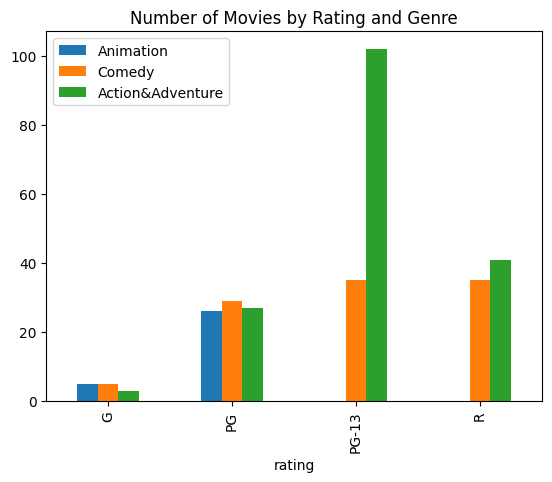

In [121]:
moviesByGenre.plot(kind='bar', title='Number of Movies by Rating and Genre')

Find the average critic and audience rating for an Animation movie vs a non-Animation movie. Do the same for Action & Adventure and Comedy. What insights do you gather?

In [122]:
movies.groupby('Animation')[['audience_rating', 'tomatometer_rating']].mean()

,audience_rating,tomatometer_rating
Animation,,
0,64.831579,58.340351
1,75.161290,75.258065


- Animation movies are rated pretty high by both the audience and the critics

In [123]:
movies.groupby('Comedy')[['audience_rating', 'tomatometer_rating']].mean()

,audience_rating,tomatometer_rating
Comedy,,
0,67.353774,62.169811
1,62.769231,55.576923


- Comedy movies have lower ratings than the other genres

In [124]:
movies.groupby('Action&Adventure')[['audience_rating', 'tomatometer_rating']].mean()

,audience_rating,tomatometer_rating
Action&Adventure,,
0,65.391608,59.111888
1,66.219653,60.734104


- Action & Adventure movies are liked more from the audience than the critics

##### Other Insights:
- Usually the audience is more lenient (tends to give higher ratings) than the critics (at RottenTomatoes)

## 3. Visualize the Data

Create a pair plot from the popular movies DataFrame.

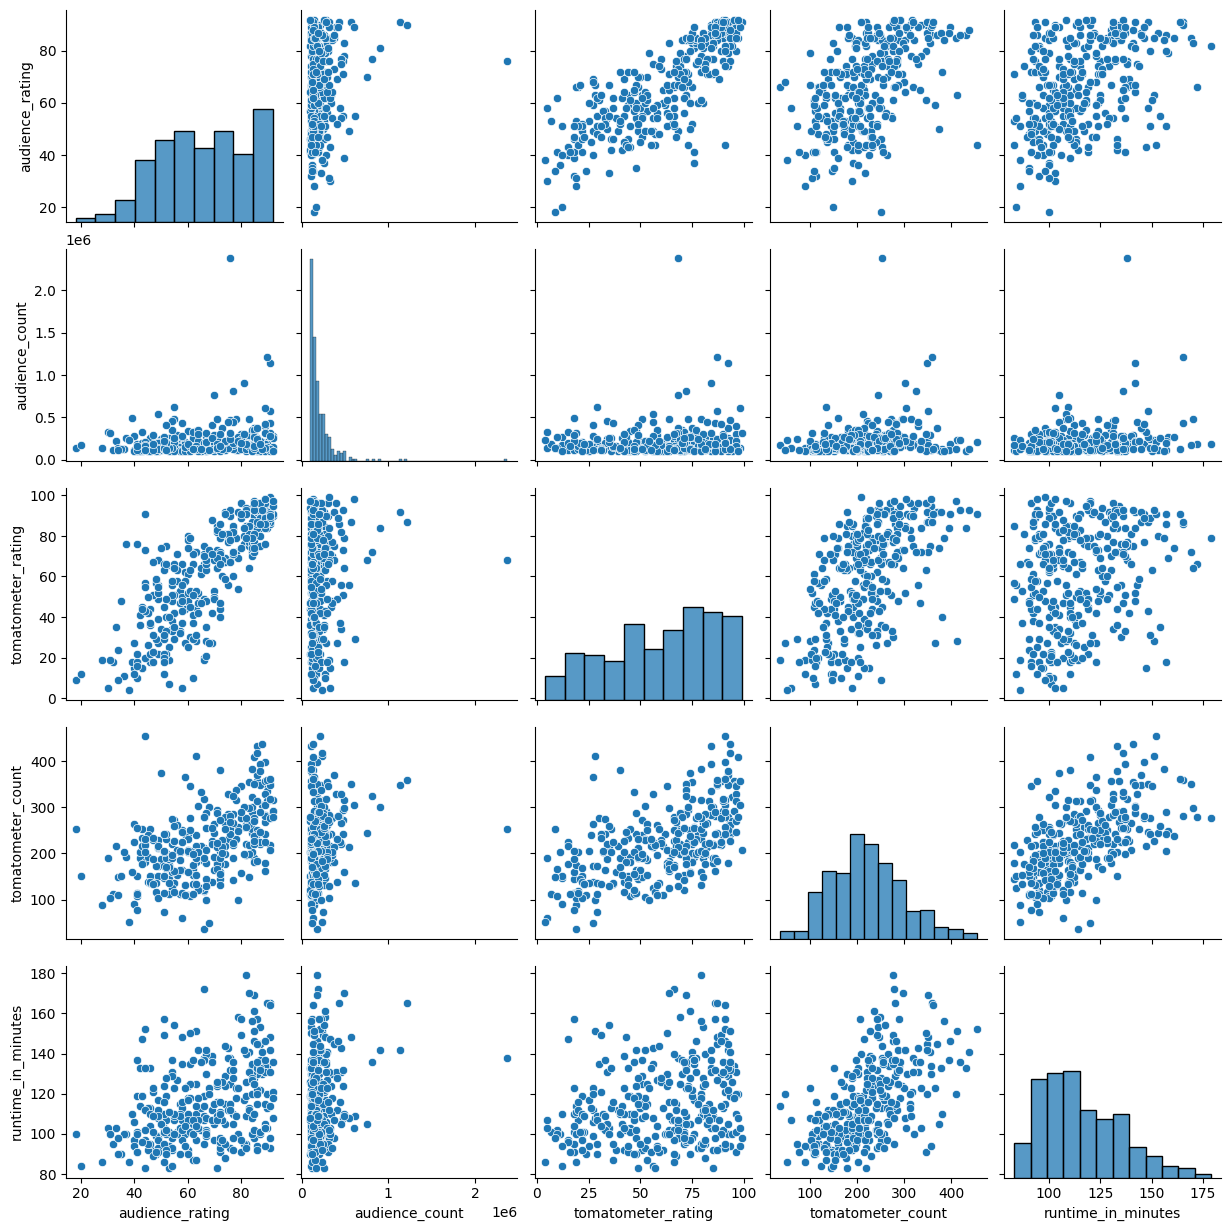

In [130]:
sns.pairplot(movies[['audience_rating', 'audience_count', 'tomatometer_rating', 'tomatometer_count', 'runtime_in_minutes']])

What insights can you gather from this pair plot?
* How do the critic ratings (tomatometer_rating) compare with the audience ratings (compare the histograms)?
* What are some surprising findings about the run times of movies compared with other fields (look at the scatter plots)?
* What is the most popular movie by far in terms of the number of audience ratings?

1. Critics tend to be more strict on their reviews than the general audience. 
   - We can see that as there are more lower rated movies in the tomatometer_rating histogram.
2. As we can deduce from the scatterplots between the runtime_in_minutes and the tomatometer_rating columns, there is a positive corelation between them. 
   - Which means that longer movies tend to get rated higher from critics.
3. There is a movie with an extreme number of reviews from the audience, but a low number of reviews from critics.
   - That movie is possibly an outlier.

In [132]:
movies['audience_count'].max()

2373625.0

In [133]:
movies['audience_count'].idxmax()

1646

In [134]:
movies.movie_title.loc[1646]

'Shutter Island'

In [136]:
movies[movies['audience_count'] > 1e6]

,movie_title,rating,genre,in_theaters_date,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,audience_count,Animation,Comedy,Action&Adventure
1646,Shutter Island,R,"Action & Adventure, Drama, Mystery & Suspense",2010-02-19,138.0,68,253,76.0,2373625.0,0,0,1
9581,Marvel's The Avengers,PG-13,"Action & Adventure, Science Fiction & Fantasy",2012-05-04,142.0,92,348,91.0,1134955.0,0,0,1
13936,The Dark Knight Rises,PG-13,"Action & Adventure, Drama, Mystery & Suspense",2012-07-20,165.0,87,360,90.0,1210957.0,0,0,1


In [138]:
movies[['audience_rating', 'audience_count', 'tomatometer_rating', 'tomatometer_count', 'runtime_in_minutes']].corr()

,audience_rating,audience_count,tomatometer_rating,tomatometer_count,runtime_in_minutes
audience_rating,1.000000,0.158131,0.798293,0.528196,0.396743
audience_count,0.158131,1.000000,0.098334,0.192638,0.225332
tomatometer_rating,0.798293,0.098334,1.000000,0.581145,0.261717
tomatometer_count,0.528196,0.192638,0.581145,1.000000,0.581755
runtime_in_minutes,0.396743,0.225332,0.261717,0.581755,1.000000
